In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Loading the dataset
df = pd.read_csv("I:\Projects\movies.csv")
#Take a look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Checking for missing data
df.isnull().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# replacing the nullvalues
dfn=df.fillna(np.mean(df))
dfn=dfn.dropna()
dfn.isnull().sum()

C:\Users\harik\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [6]:
# checking the datatypes of dataframe
dfn.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# changing data types 
dfn['budget']=dfn['budget'].astype('int64')
dfn['gross']=dfn['gross'].astype('int64')

In [8]:
dfn['released']=dfn['released'].astype(str)

In [9]:
#created correct year of release
dfn['year_of_release']=dfn['released'].str.extract(pat='([0-9]{4})')
dfn.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_release
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [10]:
# sorting the data
dfn=dfn.sort_values(by=['gross'],inplace=False,ascending=False)

In [11]:
dfn.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_release
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [12]:
#drop duplicate values
dfn.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_release
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35589876,1672,Polygram Filmed Entertainment,87.0,1998
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35589876,1605,Balboa Entertainment,110.0,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,2020


## Hypothesis that budget has high correlation with gross
## Hypothesis that company has high correlation with gross

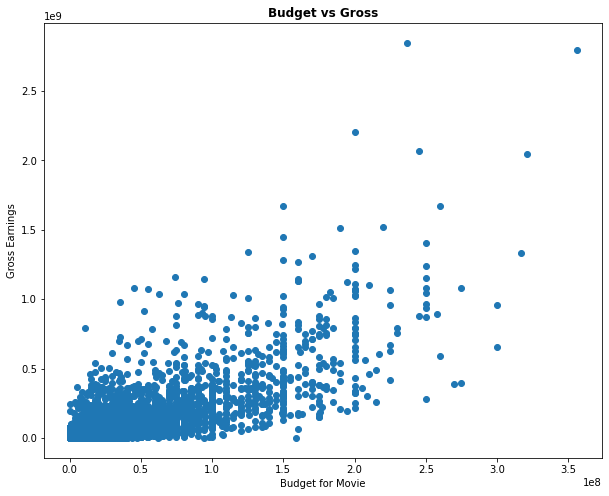

In [14]:
#scatter plot with budget and gross
plt.figure(figsize=(10,8))
plt.scatter(x=dfn['budget'], y=dfn['gross'])
plt.title('Budget vs Gross', fontweight='bold')
plt.xlabel('Budget for Movie')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

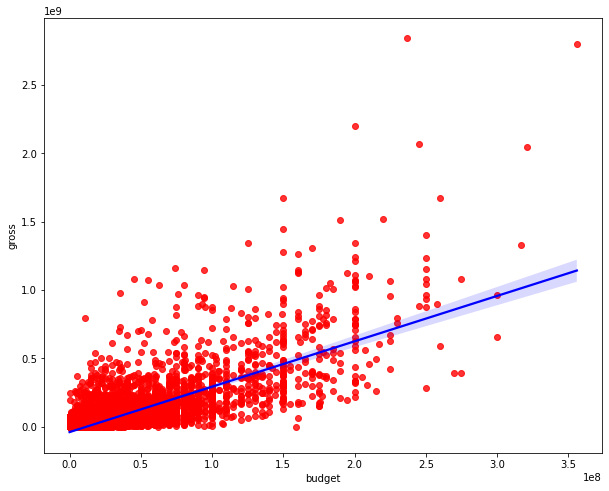

In [15]:
#Plotting budget and gross - regression
plt.figure(figsize=(10,8))
sns.regplot(x='budget', y='gross',data=dfn,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [16]:
#Correlation
dfn.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.102154,0.226789,0.268848,0.254159,0.120810
score,0.102154,1.000000,0.411938,0.064654,0.185084,0.400526
votes,0.226789,0.411938,1.000000,0.421218,0.629325,0.309353
budget,0.268848,0.064654,0.421218,1.000000,0.712561,0.265934
gross,0.254159,0.185084,0.629325,0.712561,1.000000,0.241618
runtime,0.120810,0.400526,0.309353,0.265934,0.241618,1.000000


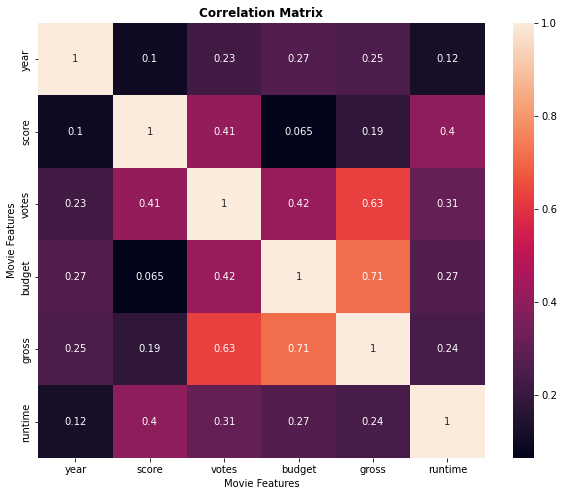

In [17]:
#0.71 gives high correlation between budget and gross, supports hypothesis
#Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(dfn.corr(method='pearson'), annot=True)
plt.title("Correlation Matrix", fontweight='bold')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [18]:
#For non numeric correlation
#Numerise companies
df_numerise = dfn
for col_name in df_numerise.columns:
    if (df_numerise[col_name].dtype == 'object'):
        df_numerise[col_name] = df_numerise[col_name].astype('category')
        df_numerise[col_name] = df_numerise[col_name].cat.codes
df_numerise

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_release
5445,527,5,0,2009,688,7.8,1100000.0,1137,1757,2284,55,237000000,2847246203,2209,162.0,29
7445,529,5,0,2019,180,8.4,903000.0,160,730,2193,55,356000000,2797501328,1572,181.0,39
3045,6813,5,6,1997,696,7.8,1100000.0,1137,1757,1560,55,200000000,2201647264,2209,194.0,17
6663,5077,5,0,2015,690,7.8,876000.0,1107,2519,508,55,245000000,2069521700,1506,138.0,35
7244,530,5,0,2018,189,8.4,897000.0,160,730,2193,55,321000000,2048359754,1572,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,2656,6,5,1998,2996,6.1,2900.0,1919,1260,2113,54,35589876,1672,1830,87.0,18
2906,4340,3,5,1996,518,7.4,37000.0,2014,1934,1473,11,35589876,1605,327,110.0,16
3818,3320,6,4,2000,1103,6.5,5200.0,717,1105,2269,54,35589876,1400,463,103.0,21
7580,4602,3,5,2019,1814,5.2,735.0,1423,2177,2229,55,35589876,682,1949,93.0,40


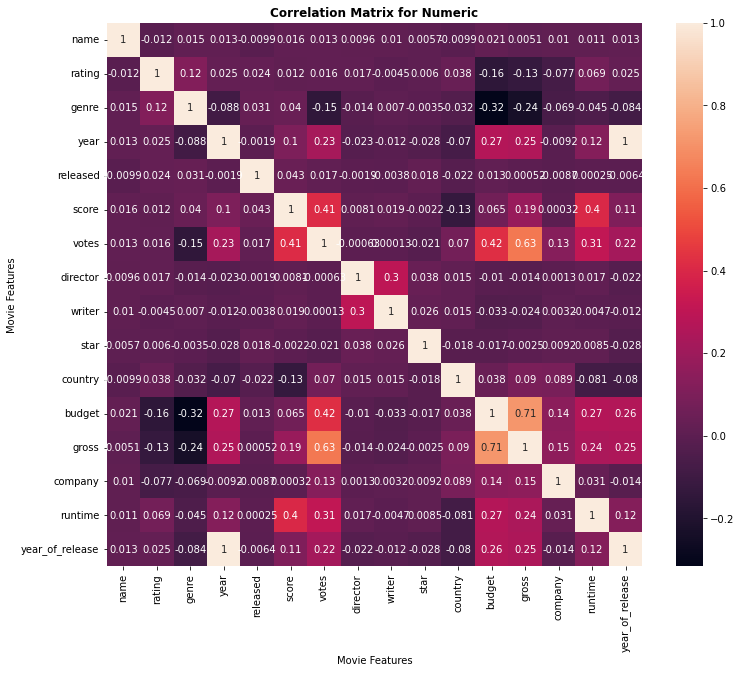

In [19]:
#Correlation matrix among every attribute
correlation_matrix = df_numerise.corr(method='pearson')
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric", fontweight='bold')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [20]:
#Closer look at correlation by pairing attributes
correlation_mat = df_numerise.corr()
corr_pair = correlation_mat.unstack()
corr_pair

name             name               1.000000
                 rating            -0.011944
                 genre              0.015250
                 year               0.013483
                 released          -0.009936
                                      ...   
year_of_release  budget             0.262773
                 gross              0.247520
                 company           -0.014204
                 runtime            0.120502
                 year_of_release    1.000000
Length: 256, dtype: float64

In [21]:
#Pair in ascending orders
sorted_pair = corr_pair.sort_values()
sorted_pair

genre            budget            -0.316818
budget           genre             -0.316818
genre            gross             -0.238240
gross            genre             -0.238240
rating           budget            -0.156385
                                      ...   
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
runtime          runtime            1.000000
year_of_release  year_of_release    1.000000
Length: 256, dtype: float64

In [22]:
#Filter highest correlation pair
high_corr = sorted_pair[(sorted_pair>0.5) & (sorted_pair<1)]
high_corr

gross            votes              0.629325
votes            gross              0.629325
budget           gross              0.712561
gross            budget             0.712561
year_of_release  year               0.997468
year             year_of_release    0.997468
dtype: float64

## Votes and budget have highest correlation with gross, .62 and .71
### Company has very low correlation with gross. That hypothesis is wrong